### **Data Preparation**

This section introduces the dataset, describing each column's purpose, expected range, and justification for its values.

| **Column**              | **Description**                                                                                      | **Expected Range**                | **Justification**                                                                                   |
|-------------------------|------------------------------------------------------------------------------------------------------|-----------------------------------|-----------------------------------------------------------------------------------------------------|
| **ID**                  | A unique identifier for each customer or transaction.                                                | Unique identifier in **string** format | A unique identifier for each record.                                                                |
| **n_clicks**            | The number of clicks made by the user in the online store, indicating interest.                      | Positive values                   | Negative values are nonsensical and should be corrected. Expected range is 0 to 1000 clicks.        |
| **n_visitas**           | The number of visits to the online store by a customer.                                              | Positive values                   | Negative values are invalid. Common range is 0 to 300 visits depending on the customer.             |
| **monto_compras**       | The total amount spent by the customer in the store.                                                 | Positive values                   | Negative values are not valid. Exceptional values may exceed 5000 monetary units but are valid.     |
| **monto_descuentos**    | The total amount of discounts applied to the customer.                                               | Positive values                   | Discounts cannot be negative. They are typically based on a percentage of the total purchase.       |
| **dias_primera_compra** | The number of days since the customer's first purchase.                                             | Positive values                   | Negative values are not possible. Expected range is from 0 to 500 days.                            |
| **info_perfil**         | Classification of customers into profiles based on behavior or characteristics.                      | Integers between 100 and 350      | Negative values are illogical and should be corrected. This field categorizes customers by behavior. |

In [29]:
import sys
import os
sys.path.append(os.path.abspath("..")) 
from customer_segmentation.dataset import load_dataset, save_dataset
from customer_segmentation.data_cleaning import summarize_nulls, filter_nulls,summarize_negatives, filter_negatives,summarize_zeros, filter_zeros,remove_nulls, remove_negatives, remove_zeros
from customer_segmentation.plot import plot_boxplot

In [30]:
# Loading dataset
dataset_path = "../data/raw/dataset_ecommerce.csv"
df = load_dataset(dataset_path)

#### **Initial Data Inspection**

This section focuses on exploring the dataset structure by displaying initial and final records to identify potential issues or inconsistencies.

In [31]:
# Viewing data
df.head()

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
0,GGNEPpxo,198.0,44.0,3393.0,67.0,241.0,235.0
1,tRA5byjK,303.0,74.0,3026.3,90.4,193.0,246.0
2,vWxSsT0V,267.0,60.0,3490.2,80.5,111.0,220.0
3,sxVV8jGL,177.0,85.0,3525.1,92.7,142.0,200.0
4,YBs4XIN5,224.0,73.0,2980.9,72.6,227.0,109.0


In [32]:
df.tail()

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
55051,dDUYxBmO,340.0,80.0,601.0,147.2,201.0,149.0
55052,RIVOxIid,376.0,91.0,1007.5,174.0,226.0,150.0
55053,drs3JLHK,416.0,52.0,753.1,113.0,188.0,241.0
55054,VwC0SosV,457.0,60.0,223.2,111.8,199.0,117.0
55055,QpvBVWDL,356.0,142.0,816.5,172.7,184.0,194.0



Observing these two samples, each consisting of 5 records, it is possible to verify that there are apparently no anomalous records with null or negative values. However, this is not sufficient to rule out their existence. Therefore, a more general approach will be applied.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55056 entries, 0 to 55055
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55056 non-null  object 
 1   n_clicks             55049 non-null  float64
 2   n_visitas            55048 non-null  float64
 3   monto_compras        55050 non-null  float64
 4   monto_descuentos     55052 non-null  float64
 5   dias_primera_compra  55055 non-null  float64
 6   info_perfil          55047 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.9+ MB


This initial approach shows that there are indeed anomalous records containing null values. The only column that does not include any null values is the ``ID`` column, while all others contain at least one, as the count of their non-null values differs from the total number of records.

#### **Data Statistics**

This section provides a summary of the dataset's key statistical properties, including counts, means, and distributions for all columns.

In [34]:
df.describe()

,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
count,55049.000000,55048.000000,55050.000000,55052.000000,55055.000000,55047.000000
mean,408.723083,94.028702,1748.510134,448.956200,197.098865,176.211783
std,175.677082,34.891261,1164.969753,503.152846,48.536769,43.640122
min,-21.000000,-20.000000,-123.100000,-27.700000,-16.000000,-15.000000
25%,267.000000,67.000000,749.800000,87.500000,165.000000,148.000000
50%,369.000000,87.000000,1380.200000,145.400000,197.000000,177.000000
75%,528.000000,117.000000,2787.500000,932.800000,229.000000,205.000000
max,1185.000000,258.000000,5621.600000,2214.100000,417.000000,358.000000


On the other hand, this second approach confirms the presence of anomalous records containing negative values. All numeric columns include at least one negative value, as their minimum values are expected to be positive according to business logic.

Additionally, it is evident that all columns have a high standard deviation. This indicates that the values within their distributions are highly dispersed relative to their means.

However, the columns ``n_clicks``, ``n_visitas``, ``monto_compras``, and ``monto_descuentos`` exhibit the most asymmetric distributions, as their means and medians differ significantly from one another.

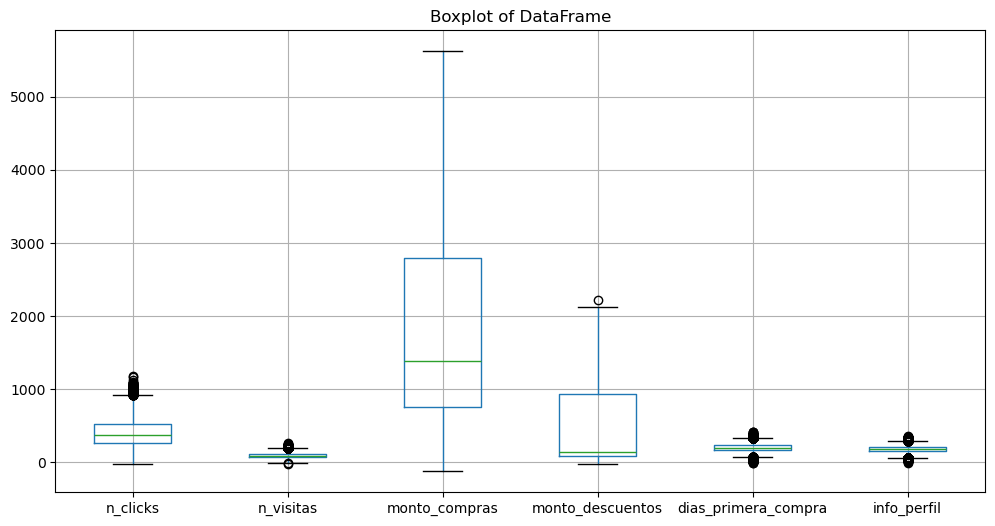

In [35]:
# Viewing the distributions of all columns
plot_boxplot(df)

Now, based on this graph, the previously mentioned observations can be confirmed. Indeed, each numeric column contains at least one negative value, as their distributions display a lower whisker or a value below the origin.

Additionally, the columns ``n_clicks``, ``n_visitas``, ``monto_compras``, and ``monto_descuentos`` exhibit asymmetric distributions. This is either because most of their regular values are concentrated within a specific range or due to the presence of outliers concentrated on one of the two whiskers.

##### **Key Observations**

- All numeric columns have negative values, which contradict business logic.
- High skewness is observed in the distributions of `n_clicks`, `n_visitas`, `monto_compras`, and `monto_descuentos`.
- The presence of negative minimum values and high dispersion suggests potential errors or anomalies in the data.

#### **Null Values Analysis**

This section examines the presence of null values across the dataset, identifying problematic records and discussing strategies to address them.

In [36]:
# Viewing NaN values
summarize_nulls(df)

Total NaN values per column:
ID                     0
n_clicks               7
n_visitas              8
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64


Visualizing the number of null values per column confirms the observations from the initial approach. Indeed, there are anomalous records containing null values, while the only column without any null values is the ``ID`` column.

##### **Looking for especific NaN values per columns**

In [37]:
# Looking NaN values in n_clicks column
filter_nulls(df, "n_clicks")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
5145,9gXNhlkr,NaN,84.0,2447.6,99.0,126.0,236.0
17162,awa5cwh8,NaN,64.0,2939.2,64.6,192.0,160.0
26692,VXX86e57,NaN,78.0,1841.5,943.9,138.0,182.0
27951,44CtUXDA,NaN,137.0,1629.5,1467.6,134.0,178.0
36739,2t43iRJl,NaN,104.0,344.9,108.8,237.0,175.0
37424,qRwHB2FO,NaN,98.0,921.7,137.2,234.0,214.0
40894,Y5v5Cfm5,NaN,119.0,656.3,147.7,232.0,153.0


In [38]:
# Looking NaN values in n_visitas column
filter_nulls(df, "n_visitas")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
322,9tJuzqv2,234.0,NaN,2966.3,89.1,222.0,183.0
12821,wFI0ve3K,237.0,NaN,3416.8,80.8,147.0,165.0
25453,yIkbk0y9,607.0,NaN,1546.9,1220.0,120.0,248.0
35405,oAuY09Si,444.0,NaN,920.1,1242.8,185.0,153.0
47362,fB5ROmQw,500.0,NaN,806.8,149.9,231.0,193.0
51214,ODoXBOet,486.0,NaN,499.3,116.9,126.0,204.0
52169,6dkx0U2q,305.0,NaN,382.0,139.9,216.0,169.0
53415,5vK1od0S,554.0,NaN,880.5,133.2,77.0,175.0


In [39]:
# Looking NaN values in monto_compras column
filter_nulls(df, "monto_compras")


,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
575,fxADTnTp,302.0,72.0,NaN,72.9,192.0,174.0
1794,2gf5Hlv4,320.0,48.0,NaN,88.3,145.0,190.0
12176,Aivyl6NW,295.0,53.0,NaN,67.5,120.0,177.0
25421,6beOIYdL,455.0,127.0,NaN,1184.8,239.0,134.0
28411,yZoZbhDU,708.0,159.0,NaN,1891.1,234.0,168.0
48099,eHW6TQEP,391.0,105.0,NaN,200.3,240.0,127.0


In [40]:
# Looking NaN values in monto_descuentos column
filter_nulls(df, "monto_descuentos")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
29274,bdWwPeqZ,679.0,118.0,1153.9,NaN,217.0,190.0
30243,nFR6Nb9u,651.0,126.0,1599.6,NaN,147.0,173.0
41763,u3uTwE4a,327.0,42.0,802.4,NaN,214.0,195.0
47663,bKQWNgmS,451.0,63.0,614.9,NaN,93.0,226.0


In [41]:
# Looking NaN values in dias_primera_compra column
filter_nulls(df, "dias_primera_compra")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
41286,F5HDwZQl,300.0,119.0,639.5,157.1,NaN,254.0


In [42]:
# Looking NaN values in info_perfil column
filter_nulls(df, "info_perfil")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
2355,DuIxWNRx,251.0,85.0,3218.3,82.8,239.0,NaN
4461,m2qRM7GV,201.0,97.0,3290.1,99.0,182.0,NaN
5213,xXneFmSB,213.0,49.0,4715.4,71.1,263.0,NaN
16540,3rLG6MOc,259.0,78.0,3554.5,106.1,171.0,NaN
31593,EmxKuekb,728.0,108.0,1767.4,1227.0,183.0,NaN
35991,p3QEz4w8,531.0,140.0,1509.1,889.4,212.0,NaN
43061,7eWUiBnp,506.0,101.0,1011.0,149.3,243.0,NaN
51891,vgPOW2B5,478.0,80.0,563.5,195.0,342.0,NaN
54500,GQ0BO5rS,248.0,81.0,469.8,69.3,197.0,NaN


The null values in the columns ``n_clicks``, ``n_visitas``, ``monto_compras``, ``monto_descuentos``, ``dias_primera_compra``, and ``info_perfil`` represent errors according to business logic. By analyzing the anomalous records associated with these null values, it can be determined that they are non-representative since their values in other columns are not significant compared to the maximums and minimums. Therefore, a reasonable decision is to remove these anomalous records, as they constitute a small proportion of the total number of records and will not significantly impact the distribution of each column.

##### **Key Observations**


- The `ID` column contains no null values, while all other columns have at least one null value.
- Although null values represent a small fraction of the total records, they are considered errors according to business logic.
- Decision: Remove records with null values due to their low impact on the dataset size.

In [43]:
# Cleaning NaN values
clean_df = remove_nulls(df)

| Metric               | Value   |
|----------------------|---------|
| Total rows before    | 55,056  |
| Total rows after     | 55,021  |
| Rows removed         | 35      |

#### **Negative Values Analysis**

This section investigates numeric columns for any negative values, which are considered anomalies based on the dataset's business logic.

In [44]:
# Viewing negative values
summarize_negatives(clean_df)

Total negative values per column:
n_clicks               2
n_visitas              4
monto_compras          1
monto_descuentos       2
dias_primera_compra    5
info_perfil            1
dtype: int64



By analyzing the number of negative values per numeric column, the observations from the second approach can be confirmed. Clearly, there are anomalous records containing negative values in all numeric columns.

##### **Looking for especific Negative values per columns**

In [45]:
# Looking negative values in n_cliks column
filter_negatives(clean_df, "n_clicks")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
52456,xWpZISMH,-21.0,135.0,771.5,74.0,308.0,209.0
54157,fVXS2Q6K,-3.0,95.0,735.1,76.5,175.0,212.0


In [46]:
# Looking negative values in n_visitas column
filter_negatives(clean_df, "n_visitas")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
36997,7tkpLAj2,483.0,-6.0,630.2,137.7,115.0,183.0
40309,92EBlM03,368.0,-12.0,1048.2,108.7,220.0,170.0
41638,hmGnkF9Q,364.0,-20.0,650.8,125.0,175.0,149.0
42255,OpdXMDd1,420.0,-4.0,413.6,152.3,140.0,183.0


In [47]:
# Looking negative values in monto_compras column
filter_negatives(clean_df, "monto_compras")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
47195,kfQhtaZH,263.0,70.0,-123.1,109.6,151.0,152.0


In [48]:
# Looking negative values in monto_descuentos column
filter_negatives(clean_df, "monto_descuentos")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
47567,2Kv3NSaq,264.0,62.0,740.0,-27.7,200.0,203.0
51799,iJfuldrA,319.0,103.0,512.2,-0.6,125.0,116.0


In [49]:
# Looking negative values in info_perfil column
filter_negatives(clean_df, "info_perfil")

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
47620,GEdQeqBj,255.0,82.0,856.2,208.9,88.0,-15.0


The negative values in the columns ``n_clicks``, ``n_visitas``, ``monto_compras``, ``monto_descuentos``, ``dias_primera_compra``, and ``info_perfil`` represent errors according to business logic. Analyzing the anomalous records associated with these values reveals that they are non-representative since their values in other columns are not significant compared to the maximums and minimums. Therefore, a reasonable decision is to remove these anomalous records, as they constitute a small fraction of the total number of records and will not significantly impact the distribution of each column.

In [50]:
# Cleaning negative values
clean_df = remove_negatives(clean_df)

| Metric               | Value   |
|----------------------|---------|
| Total rows before    | 55,021  |
| Total rows after     | 55,006  |
| Rows removed         | 15      |

#### **Zero Values Analysis**

This section identifies zero values in key columns, determining their validity and deciding on actions to handle them if necessary.

In [51]:
# Viewing Zero values
summarize_zeros(clean_df)

Total zero values per column:
n_clicks               0
n_visitas              3
monto_compras          0
monto_descuentos       0
dias_primera_compra    1
info_perfil            0
dtype: int64


Reviewing the zero values for each column, it can be identified that the columns ``n_visitas`` and ``dias_primera_compra`` include potential records of interest that should be reviewed to verify if the rest of their values make sense.

In [52]:
# Looking zero values in all columns
filter_zeros(clean_df)

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
39297,duDuP9OA,390.0,80.0,823.6,157.5,0.0,169.0
42286,THuzA6TM,364.0,0.0,212.3,88.7,168.0,176.0
44864,palh4Gcg,312.0,0.0,349.8,121.3,275.0,171.0
54071,4lAbne98,363.0,0.0,552.0,190.9,168.0,156.0


The zero values in the columns ``n_visitas`` and ``dias_primera_compra``  represent errors according to business logic, as they do not make sense nor have any relation to the rest of the values associated with their respective records. Evaluating the other values, it can be established that these are common since they are not representative as maximums and minimums. In this sense, a reasonable decision is to remove these anomalous records, as they are not considered highly relevant and are very few compared to the total number of records.

##### **Key Observations**

- The columns `n_visitas` and `dias_primera_compra` contain zero values, which may represent errors based on business logic.
- Zero values in these columns do not align with their respective purposes, as they suggest impossible scenarios (e.g., zero visits or zero days since first purchase).
- Decision: Remove records with zero values in these columns, as they represent a small fraction of the dataset and do not significantly impact the analysis.

In [53]:
# Cleaning zero values
clean_df = remove_zeros(clean_df)

| Metric               | Value   |
|----------------------|---------|
| Total rows before    | 55,006  |
| Total rows after     | 55,002  |
| Rows removed         | 4       |

#### **Outlier Detection and Cleaning**

This section detects extreme outlier values in numeric columns and discusses their potential impact on analysis, followed by cleaning actions.

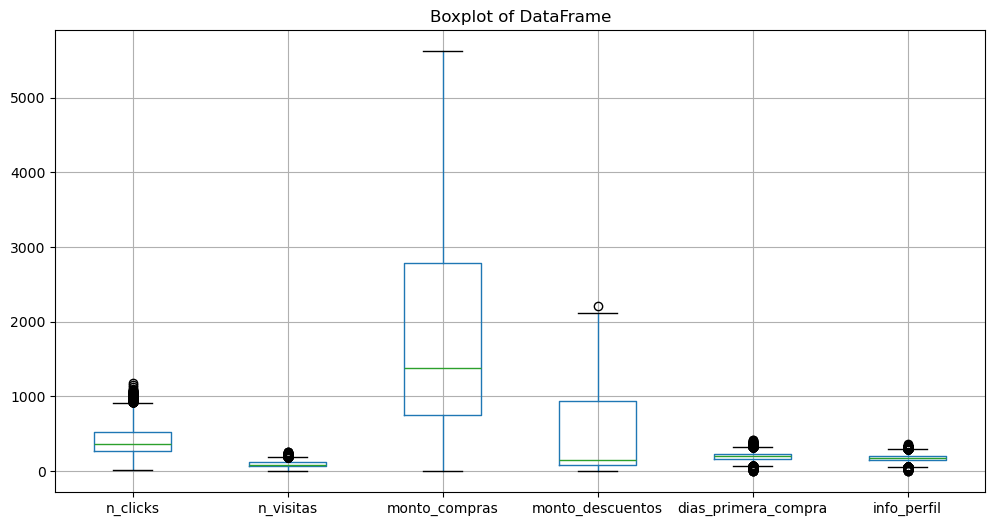

In [54]:
# Viewing the distributions of all columns
plot_boxplot(clean_df)

Based on the graph of the distributions for all numeric columns, it can be confirmed that the only column without outliers is ``monto_compras``. In contrast, all other columns contain at least one outlier. Since the number of these values is quite large in most columns, a reasonable decision is to retain all records containing them. Removing these outliers could significantly alter the distribution of each column, potentially having a negative impact on future analysis and segmentation.

#### **Saving Cleaned Data**

This section saves the cleaned and processed dataset to a CSV file for future analysis and modeling.

| Metric               | Value   |
|----------------------|---------|
| Total rows before    | 55,056  |
| Total rows after     | 55,002  |
| Rows removed         | 54      |

In [55]:
# Saving dataframe
output_path = "../data/processed/cleaned_dataset.csv"
save_dataset(clean_df, output_path)